In [47]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.layers import Dense,Activation,Flatten,Input,Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.utils import np_utils
import random

import matplotlib.pyplot as plt

In [48]:
base_path = "images"
dirs = os.listdir("images")

In [49]:
print(dirs)

['cats', 'humans', 'dogs', 'horses']


In [50]:
folder_path = ""

In [51]:
image_data = []

In [52]:
labels = []

In [53]:
label_dict = {'cats':0,'dogs':1,'horses':2,'humans':3}

In [45]:
for ix in dirs:
    path = os.path.join(base_path,ix)
    img_data = os.listdir(path)
    for im in img_data:
        img = image.load_img(os.path.join(path,im),target_size=(224,224))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])

In [46]:
print(len(image_data), len(labels))

808 808


In [13]:
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

In [14]:
X_train = np.array(image_data)
Y_train = np.array(labels)

print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808,)


In [15]:
Y_train = np_utils.to_categorical(Y_train)
print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808, 4)


In [16]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [20]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(1024,activation='relu')(av1)
fc2 = Dense(512,activation='relu')(fc1)
fc3 = Dense(256,activation='relu')(fc2)
d1 = Dropout(0.5)(fc3)
fc4 = Dense(4,activation='softmax')(d1)

model_new = Model(inputs=model.input, outputs= fc4)
model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [21]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [22]:
for ix in range(len(model_new.layers)):
    print(ix, model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7f138f2697b8>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f138f269dd8>
2 <keras.layers.convolutional.Conv2D object at 0x7f138f269b70>
3 <keras.layers.normalization.BatchNormalization object at 0x7f138f1a9ba8>
4 <keras.layers.core.Activation object at 0x7f138f1a9dd8>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f13719307f0>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f1371930a20>
7 <keras.layers.convolutional.Conv2D object at 0x7f138f165b00>
8 <keras.layers.normalization.BatchNormalization object at 0x7f13700742b0>
9 <keras.layers.core.Activation object at 0x7f1370074fd0>
10 <keras.layers.convolutional.Conv2D object at 0x7f13606d7d30>
11 <keras.layers.normalization.BatchNormalization object at 0x7f136068afd0>
12 <keras.layers.core.Activation object at 0x7f13606a7978>
13 <keras.layers.convolutional.Conv2D object at 0x7f136062ae10>
14 <keras.layers.convolutional.Conv2D object at 0x7f136058fc50>
15 <keras.lay

In [23]:
for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [24]:
hist = model_new.fit(X_train,Y_train,
                    shuffle = True,
                    batch_size = 16,
                    epochs = 5,
                    validation_split=0.20
                    )

Instructions for updating:
Use tf.cast instead.
Train on 646 samples, validate on 162 samples
Epoch 1/5
646/646 [==============================] - 37s 57ms/step - loss: 1.1344 - acc: 0.5310 - val_loss: 0.6845 - val_acc: 0.8086
Epoch 2/5
646/646 [==============================] - 26s 41ms/step - loss: 0.5379 - acc: 0.8684 - val_loss: 0.3002 - val_acc: 0.9259
Epoch 3/5
646/646 [==============================] - 27s 42ms/step - loss: 0.3013 - acc: 0.9303 - val_loss: 0.2104 - val_acc: 0.9321
Epoch 4/5
646/646 [==============================] - 28s 43ms/step - loss: 0.1850 - acc: 0.9551 - val_loss: 0.1430 - val_acc: 0.9568
Epoch 5/5
646/646 [==============================] - 28s 43ms/step - loss: 0.1209 - acc: 0.9768 - val_loss: 0.1178 - val_acc: 0.9630


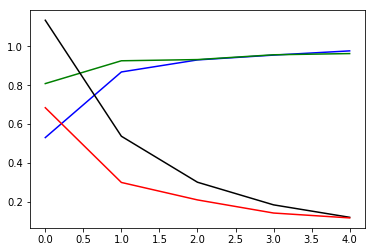

In [25]:
plt.figure(0)
plt.plot(hist.history['acc'],'b')
plt.plot(hist.history['val_acc'],'g')
plt.plot(hist.history['loss'],'black')
plt.plot(hist.history['val_loss'],'red')
plt.show()

## InceptionResnetV2

In [67]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions

In [68]:
for ix in dirs:
    path = os.path.join(base_path,ix)
    img_data = os.listdir(path)
    for im in img_data:
        img = image.load_img(os.path.join(path,im),target_size=(299,299))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])

In [ ]:
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)
X_train = np.array(image_data)
Y_train = np.array(labels)

print(X_train.shape,Y_train.shape)
Y_train = np_utils.to_categorical(Y_train)
print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808,)


In [70]:
model = InceptionResNetV2(include_top=False,weights='imagenet',input_shape=(299,299,3))

In [71]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 149, 149, 32) 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_253 (Activation)     (None, 149, 149, 32) 0           batch_normalization_204[0][0]    
__________________________________________________________________________________________________
conv2d_205

block8_8_conv (Conv2D)          (None, 8, 8, 2080)   933920      block8_8_mixed[0][0]             
__________________________________________________________________________________________________
block8_8 (Lambda)               (None, 8, 8, 2080)   0           block8_7_ac[0][0]                
                                                                 block8_8_conv[0][0]              
__________________________________________________________________________________________________
block8_8_ac (Activation)        (None, 8, 8, 2080)   0           block8_8[0][0]                   
__________________________________________________________________________________________________
conv2d_400 (Conv2D)             (None, 8, 8, 192)    399360      block8_8_ac[0][0]                
__________________________________________________________________________________________________
batch_normalization_400 (BatchN (None, 8, 8, 192)    576         conv2d_400[0][0]                 
__________

In [63]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(1536,activation='relu')(av1)
fc1 = Dense(1024,activation='relu')(av1)
fc2 = Dense(512,activation='relu')(fc1)
fc3 = Dense(256,activation='relu')(fc2)
d1 = Dropout(0.5)(fc3)
fc4 = Dense(4,activation='softmax')(d1)

model_new = Model(inputs=model.input, outputs= fc4)
model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 256)          0           dense_20[0][0]                   
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 4)            1028        dropout_4[0][0]                  
Total params: 56,567,780
Trainable params: 5,427,460
Non-trainable params: 51,140,320
__________________________________________________________________________________________________


In [64]:
adam = Adam(lr=0.003)
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
for ix in range(len(model_new.layers)):
    print(ix, model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7f12e04a2278>
1 <keras.layers.convolutional.Conv2D object at 0x7f12e257a630>
2 <keras.layers.normalization.BatchNormalization object at 0x7f12e2bdc400>
3 <keras.layers.core.Activation object at 0x7f12e256b470>
4 <keras.layers.convolutional.Conv2D object at 0x7f12e045ea58>
5 <keras.layers.normalization.BatchNormalization object at 0x7f12e039c940>
6 <keras.layers.core.Activation object at 0x7f12e0357c18>
7 <keras.layers.convolutional.Conv2D object at 0x7f12e0310240>
8 <keras.layers.normalization.BatchNormalization object at 0x7f12e033f6d8>
9 <keras.layers.core.Activation object at 0x7f12e033f518>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f12e02695c0>
11 <keras.layers.convolutional.Conv2D object at 0x7f12e02499e8>
12 <keras.layers.normalization.BatchNormalization object at 0x7f12e01474e0>
13 <keras.layers.core.Activation object at 0x7f12e0161320>
14 <keras.layers.convolutional.Conv2D object at 0x7f12e0147b00>
15 <keras.layers.nor

In [65]:
for ix in range(780):
    model_new.layers[ix].trainable = False
    
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

batch_normalization_187 (BatchN (None, 5, 5, 256)    768         conv2d_187[0][0]                 
__________________________________________________________________________________________________
activation_233 (Activation)     (None, 5, 5, 192)    0           batch_normalization_184[0][0]    
__________________________________________________________________________________________________
activation_236 (Activation)     (None, 5, 5, 256)    0           batch_normalization_187[0][0]    
__________________________________________________________________________________________________
block8_6_mixed (Concatenate)    (None, 5, 5, 448)    0           activation_233[0][0]             
                                                                 activation_236[0][0]             
__________________________________________________________________________________________________
block8_6_conv (Conv2D)          (None, 5, 5, 2080)   933920      block8_6_mixed[0][0]             
__________

In [66]:
hist = model_new.fit(X_train,Y_train,
                    shuffle = True,
                    batch_size = 16,
                    epochs = 10,
                    validation_split=0.20
                    )

Train on 646 samples, validate on 162 samples
Epoch 1/10
646/646 [==============================] - 48s 74ms/step - loss: 1.1386 - acc: 0.6780 - val_loss: 12.0388 - val_acc: 0.2531
Epoch 2/10
256/646 [==========>...................] - ETA: 18s - loss: 0.3678 - acc: 0.8750

KeyboardInterrupt: 

In [ ]:
plt.figure(0)
plt.plot(hist.history['acc'],'b')
plt.plot(hist.history['val_acc'],'g')
plt.plot(hist.history['loss'],'black')
plt.plot(hist.history['val_loss'],'red')
plt.show()